In [2]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
dataset=load_dataset('lukebarousse/data_jobs') 

In [3]:
df=dataset['train'].to_pandas()

In [4]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [5]:
df['job_posted_date']=pd.to_datetime(df.job_posted_date)

In [6]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


Count of Job Titles


In [7]:
df.pivot_table(index='job_title_short',aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [9]:
df.pivot_table(index='job_title_short',aggfunc='count')

,company_name,job_country,job_health_insurance,job_location,job_no_degree_mention,job_posted_date,job_schedule_type,job_skills,job_title,job_type_skills,job_via,job_work_from_home,salary_hour_avg,salary_rate,salary_year_avg,search_location
job_title_short,,,,,,,,,,,,,,,,
Business Analyst,49063,49057,49063,48991,49063,49063,47812,36755,49063,36755,49063,49063,388,1024,610,49063
Cloud Engineer,12331,12329,12331,12322,12331,12331,12180,8969,12331,8969,12331,12331,21,91,65,12331
Data Analyst,196070,196067,196075,195801,196075,196075,191475,159394,196075,159394,196067,196075,4138,9746,5451,196075
Data Engineer,186236,186237,186241,186005,186241,186241,183591,169362,186240,169362,186241,186241,2277,6847,4500,186241
Data Scientist,172281,172281,172286,172072,172286,172286,170158,145807,172286,145807,172286,172286,2581,8589,5922,172286
Machine Learning Engineer,14080,14078,14080,14061,14080,14080,13890,12171,14080,12171,14080,14080,46,637,576,14080
Senior Data Analyst,29216,29214,29216,29169,29216,29216,28708,24870,29216,24870,29216,29216,353,1492,1131,29216
Senior Data Engineer,44563,44561,44563,44483,44563,44563,44098,41632,44563,41632,44563,44563,429,2033,1591,44563
Senior Data Scientist,36957,36956,36957,36901,36957,36957,36700,32076,36957,32076,36957,36957,325,2021,1690,36957


In [13]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [14]:
df.pivot_table(values='salary_year_avg',index='job_title_short',aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [16]:
df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [27]:
top_countries=df['job_country'].value_counts().head(6).index

In [28]:
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [29]:
df_job_country_salary=df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)


In [30]:
df_job_country_salary=df_job_country_salary.loc[top_countries]

In [31]:
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [43]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']

In [44]:
job_titles

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [46]:
df_job_country_salary = df_job_country_salary[job_titles]

In [47]:
df_job_country_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,90000.0,130000.0,125000.0
India,100500.0,114008.0,147500.0
United Kingdom,87750.0,105300.0,110000.0
France,69175.0,88128.0,98301.5
Germany,103750.0,131560.0,147500.0
Spain,91977.0,88128.0,133000.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

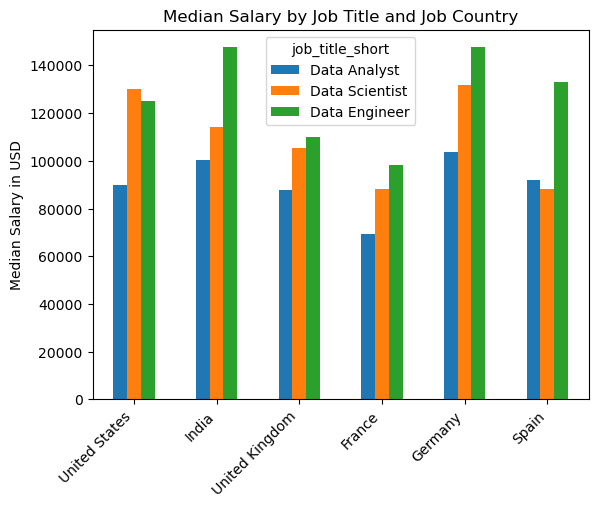

In [50]:
df_job_country_salary.plot(kind='bar')
plt.title('Median Salary by Job Title and Job Country')
plt.ylabel('Median Salary in USD')
plt.xlabel('')
plt.xticks(rotation=45 ,ha='right')